In [1]:
# Analysis of factors affecting success in securing a date during speed dating: 
#  - expectation of happiness with other participants (bar vs avg date achieved)
#  - expectation of others being interested in subject (line plot vs avg date achieved)
#  - frequency of dates on a normal basis (reverse numbering, bar of avg of date achieved)
#  - primary goal in participation (bar of avg of date achieved by category)
# date_3: if date achieved
# expnum: how many people subject expects to be interested in self - % of potentials
# exphappy: expected happiness (1-10) with people subject will meet
# date: how frequently (1-7) subject goes on dates - invert original scale
# goal: why subject is participating
# converted csv without UTF-8 encoding to xlsx to pre-edit, also to create a macro to assist me

# separate by wave with a macro, read, get metrics by person, rejoin, analyze/visualize

In [2]:
# necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [16]:
wave1_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 1"))
wave1_df.drop_duplicates(inplace=True)
wave1_df["expnumPercent"] = (wave1_df["expnum"]/wave1_df["iid"].count())*100
wave1_df = wave1_df[wave1_df.date_3 != 999]
wave1_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,1,0,2,3,7,2,20.0
10,2,0,5,4,5,1,50.0
30,4,0,2,1,5,1,20.0
40,5,0,10,7,4,2,100.0


In [24]:
wave2_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 2"))
wave2_df.drop_duplicates(inplace=True)
wave2_df["expnumPercent"] = (wave2_df["expnum"]/wave2_df["iid"].count())*100
wave2_df = wave2_df[wave2_df.date_3 != 999]
wave2_df.head()

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,11,0,3,7,5,1,30.0
30,14,0,15,8,4,2,150.0
40,15,0,9,5,4,1,90.0
50,16,0,10,7,5,1,100.0
60,17,0,2,4,3,3,20.0


In [19]:
wave3_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 3"))
wave3_df.drop_duplicates(inplace=True)
wave3_df["expnumPercent"] = (wave3_df["expnum"]/wave3_df["iid"].count())*100
wave3_df = wave3_df[wave3_df.date_3 != 999]
wave3_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,21,0,0,5,7,6,0.000000
16,22,0,2,4,6,1,10.526316
32,23,0,3,5,1,1,15.789474
64,25,0,4,5,5,1,21.052632
128,29,0,4,7,6,1,21.052632
160,31,0,4,5,4,1,21.052632
176,32,0,0,3,4,1,0.000000
192,33,0,0,4,6,6,0.000000
256,37,0,3,7,6,2,15.789474
288,39,0,5,2,6,5,26.315789


In [25]:
wave4_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 4"))
wave4_df.drop_duplicates(inplace=True)
wave4_df["expnumPercent"] = (wave4_df["expnum"]/wave4_df["iid"].count())*100
wave4_df = wave4_df[wave4_df.date_3 != 999]
wave4_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
38,42,0,3,6,7,2,18.75
57,43,0,1,3,6,6,6.25
76,44,0,5,7,3,1,31.25
95,45,0,7,7,6,2,43.75
114,46,0,8,7,6,2,50.00
152,48,0,5,6,5,1,31.25
247,53,0,9,6,6,2,56.25


In [26]:
wave5_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 5"))
wave5_df.drop_duplicates(inplace=True)
wave5_df["expnumPercent"] = (wave5_df["expnum"]/wave5_df["iid"].count())*100
wave5_df = wave5_df[wave5_df.date_3 != 999]
wave5_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,56,0,15,3,3,1,150.0
10,57,0,12,9,5,3,120.0
50,61,1,5,5,5,1,50.0
70,63,0,2,6,6,3,20.0
80,64,0,2,3,6,2,20.0
90,65,0,10,7,5,2,100.0


In [27]:
wave6_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 6"))
wave6_df.drop_duplicates(inplace=True)
wave6_df["expnumPercent"] = (wave6_df["expnum"]/wave6_df["iid"].count())*100
wave6_df = wave6_df[wave6_df.date_3 != 999]
wave6_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
30,69,1,0,3,6,6,0.0
60,72,0,9,7,6,5,90.0
80,74,0,2,9,7,5,20.0


In [28]:
wave7_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 7"))
wave7_df.drop_duplicates(inplace=True)
wave7_df["expnumPercent"] = (wave7_df["expnum"]/wave7_df["iid"].count())*100
wave7_df = wave7_df[wave7_df.date_3 != 999]
wave7_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,76,1,4,6,7,2,22.222222
18,77,1,4,6,4,1,22.222222
36,78,1,0,7,7,2,0.000000
72,80,0,10,7,5,1,55.555556
90,81,1,6,5,5,5,33.333333
108,82,0,2,7,3,1,11.111111
126,83,0,3,6,6,2,16.666667
144,84,1,5,7,4,2,27.777778
162,85,0,4,4,6,2,22.222222
198,87,0,10,4,3,1,55.555556


In [29]:
wave8_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 8"))
wave8_df.drop_duplicates(inplace=True)
wave8_df["expnumPercent"] = (wave8_df["expnum"]/wave8_df["iid"].count())*100
wave8_df = wave8_df[wave8_df.date_3 != 999]
wave8_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
54,97,1,5,5,5,2,27.777778
72,98,1,5,5,4,4,27.777778
108,100,0,4,5,3,1,22.222222
144,102,1,18,6,4,1,100.000000
162,103,0,5,6,4,2,27.777778
198,105,1,1,5,7,2,5.555556
216,106,1,2,5,7,5,11.111111
252,108,1,2,5,6,1,11.111111
288,110,0,3,6,6,2,16.666667


In [30]:
wave9_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 9"))
wave9_df.drop_duplicates(inplace=True)
wave9_df["expnumPercent"] = (wave9_df["expnum"]/wave9_df["iid"].count())*100
wave9_df = wave9_df[wave9_df.date_3 != 999]
wave9_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
10,113,1,20,7,4,1,222.222222
30,115,0,12,3,5,1,133.333333
40,116,1,20,7,1,1,222.222222
50,117,0,4,6,3,1,44.444444
70,120,0,5,3,4,5,55.555556


In [31]:
wave10_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 10"))
wave10_df.drop_duplicates(inplace=True)
wave10_df["expnumPercent"] = (wave10_df["expnum"]/wave10_df["iid"].count())*100
wave10_df = wave10_df[wave10_df.date_3 != 999]
wave10_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,122,1,10,6,3,1,100.0
40,126,1,5,6,6,4,50.0
50,127,0,20,1,5,6,200.0
60,128,0,13,5,3,1,130.0
90,131,0,0,5,7,2,0.0


In [32]:
wave11_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 11"))
wave11_df.drop_duplicates(inplace=True)
wave11_df["expnumPercent"] = (wave11_df["expnum"]/wave11_df["iid"].count())*100
wave11_df = wave11_df[wave11_df.date_3 != 999]
wave11_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
5,133,0,999,5,6,1,19980.0
10,134,0,999,8,5,1,19980.0
15,135,1,999,6,7,1,19980.0
20,136,0,999,999,999,999,19980.0


In [33]:
wave12_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 12"))
wave12_df.drop_duplicates(inplace=True)
wave12_df["expnumPercent"] = (wave12_df["expnum"]/wave12_df["iid"].count())*100
wave12_df = wave12_df[wave12_df.date_3 != 999]
wave12_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
10,139,0,999,8,6,1,19980.0


In [34]:
wave13_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 13"))
wave13_df.drop_duplicates(inplace=True)
wave13_df["expnumPercent"] = (wave13_df["expnum"]/wave13_df["iid"].count())*100
wave13_df = wave13_df[wave13_df.date_3 != 999]
wave13_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,142,0,999,7,5,1,6243.75
32,144,0,999,5,5,1,6243.75
48,145,0,999,5,7,2,6243.75
80,147,1,999,5,5,5,6243.75
112,149,1,999,4,5,1,6243.75
128,150,1,999,5,5,4,6243.75
144,151,1,999,3,3,3,6243.75
160,152,0,999,5,4,1,6243.75
176,153,1,999,6,6,2,6243.75
192,154,1,999,7,4,6,6243.75


In [35]:
wave14_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 14"))
wave14_df.drop_duplicates(inplace=True)
wave14_df["expnumPercent"] = (wave14_df["expnum"]/wave14_df["iid"].count())*100
wave14_df = wave14_df[wave14_df.date_3 != 999]
wave14_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,158,0,999,7,6,4,6243.75
16,159,0,999,6,6,1,6243.75
80,163,1,999,2,3,4,6243.75
112,165,1,999,6,6,3,6243.75
128,166,1,999,6,5,5,6243.75
176,169,0,999,6,6,2,6243.75
192,170,0,999,6,5,1,6243.75
208,171,1,999,8,4,1,6243.75


In [36]:
wave15_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 15"))
wave15_df.drop_duplicates(inplace=True)
wave15_df["expnumPercent"] = (wave15_df["expnum"]/wave15_df["iid"].count())*100
wave15_df = wave15_df[wave15_df.date_3 != 999]
wave15_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,174,0,999,5,5,4,9990.0
10,175,0,999,7,3,2,9990.0
60,180,1,999,6,4,6,9990.0
70,181,0,999,4,5,1,9990.0
80,182,0,999,6,4,1,9990.0
90,183,0,999,5,7,1,9990.0


In [37]:
wave16_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 16"))
wave16_df.drop_duplicates(inplace=True)
wave16_df["expnumPercent"] = (wave16_df["expnum"]/wave16_df["iid"].count())*100
wave16_df = wave16_df[wave16_df.date_3 != 999]
wave16_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,184,1,999,9,4,2,9990.0
10,185,0,999,6,7,1,9990.0
20,186,1,999,7,7,1,9990.0
30,187,0,999,6,4,2,9990.0
40,188,0,999,6,3,2,9990.0
50,189,0,999,5,6,1,9990.0
70,191,0,999,4,4,5,9990.0
80,192,0,999,4,6,1,9990.0
90,193,0,999,4,6,1,9990.0


In [38]:
wave17_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 17"))
wave17_df.drop_duplicates(inplace=True)
wave17_df["expnumPercent"] = (wave17_df["expnum"]/wave17_df["iid"].count())*100
wave17_df = wave17_df[wave17_df.date_3 != 999]
wave17_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,194,0,999,7,3,3,4995.0
20,195,1,999,8,2,1,4995.0
80,198,0,999,6,2,2,4995.0
100,199,1,999,4,5,4,4995.0
140,201,0,999,2,4,1,4995.0
160,202,1,999,3,6,2,4995.0
180,203,0,999,3,6,6,4995.0
200,204,0,999,4,5,3,4995.0
220,205,0,999,5,7,1,4995.0
240,206,1,999,6,5,1,4995.0


In [39]:
wave18_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 18"))
wave18_df.drop_duplicates(inplace=True)
wave18_df["expnumPercent"] = (wave18_df["expnum"]/wave18_df["iid"].count())*100
wave18_df = wave18_df[wave18_df.date_3 != 999]
wave18_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,214,0,999,6,6,1,4995.0
20,215,0,999,7,4,1,4995.0
120,220,0,999,10,5,1,4995.0
140,221,0,999,6,6,2,4995.0
180,223,0,999,7,4,2,4995.0
200,224,0,999,5,7,6,4995.0
240,226,1,999,3,3,2,4995.0
260,227,0,999,5,6,2,4995.0
300,229,0,999,3,6,1,4995.0
320,230,0,999,5,7,2,4995.0


In [40]:
wave19_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 19"))
wave19_df.drop_duplicates(inplace=True)
wave19_df["expnumPercent"] = (wave19_df["expnum"]/wave19_df["iid"].count())*100
wave19_df = wave19_df[wave19_df.date_3 != 999]
wave19_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,234,0,999,5,7,3,11100.0
9,235,1,999,5,4,1,11100.0
27,237,0,999,4,7,3,11100.0
36,238,1,999,5,2,1,11100.0
45,239,0,999,7,6,2,11100.0
54,240,0,999,2,6,1,11100.0
63,241,0,999,2,4,2,11100.0
72,242,1,999,6,7,3,11100.0


In [41]:
wave20_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 20"))
wave20_df.drop_duplicates(inplace=True)
wave20_df["expnumPercent"] = (wave20_df["expnum"]/wave20_df["iid"].count())*100
wave20_df = wave20_df[wave20_df.date_3 != 999]
wave20_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
9,244,1,999,5,5,2,11100.0
27,246,1,999,3,7,1,11100.0
36,247,0,999,6,6,1,11100.0
45,248,1,999,6,4,1,11100.0
54,249,0,999,5,3,2,11100.0
72,251,1,999,5,4,6,11100.0


In [42]:
wave21_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 21"))
wave21_df.drop_duplicates(inplace=True)
wave21_df["expnumPercent"] = (wave21_df["expnum"]/wave21_df["iid"].count())*100
wave21_df = wave21_df[wave21_df.date_3 != 999]
wave21_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
21,253,0,999,7,6,2,4757.142857
147,259,0,999,5,7,2,4757.142857
168,260,0,999,6,7,2,4757.142857
189,261,0,999,3,7,1,4757.142857
210,262,0,999,1,6,6,4757.142857
252,264,1,999,3,6,1,4757.142857
315,267,0,999,4,3,1,4757.142857
336,268,1,999,5,6,5,4757.142857
378,270,1,999,5,5,2,4757.142857
399,271,0,999,8,4,2,4757.142857


In [43]:
wave22_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 22"))
wave22_df.drop_duplicates(inplace=True)
wave22_df["expnumPercent"] = (wave22_df["expnum"]/wave22_df["iid"].count())*100
wave22_df = wave22_df[wave22_df.date_3 != 999]
wave22_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,273,1,999,5,5,2,4757.142857
21,274,1,999,6,4,3,4757.142857
63,276,1,999,4,4,2,4757.142857
84,277,1,999,5,7,1,4757.142857
105,278,0,999,8,3,1,4757.142857
147,280,1,999,5,6,3,4757.142857
231,284,1,999,7,5,1,4757.142857
315,288,1,999,5,6,1,4757.142857
336,289,1,999,7,4,1,4757.142857


In [44]:
wave23_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 23"))
wave23_df.drop_duplicates(inplace=True)
wave23_df["expnumPercent"] = (wave23_df["expnum"]/wave23_df["iid"].count())*100
wave23_df = wave23_df[wave23_df.date_3 != 999]
wave23_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
14,295,0,999,6,6,2,7135.714286
28,296,1,999,3,4,1,7135.714286
42,297,0,999,7,2,2,7135.714286
112,302,0,999,8,3,2,7135.714286
126,303,1,999,6,5,4,7135.714286
140,304,0,999,6,7,1,7135.714286
154,305,1,999,4,4,1,7135.714286
168,306,1,999,7,6,1,7135.714286
182,307,0,999,3,7,5,7135.714286


In [45]:
wave24_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 24"))
wave24_df.drop_duplicates(inplace=True)
wave24_df["expnumPercent"] = (wave24_df["expnum"]/wave24_df["iid"].count())*100
wave24_df = wave24_df[wave24_df.date_3 != 999]
wave24_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
14,309,0,999,7,3,3,7135.714286
70,313,1,999,6,4,1,7135.714286
84,314,0,999,6,6,2,7135.714286
112,316,1,999,5,4,2,7135.714286
126,317,0,999,7,4,1,7135.714286
154,319,0,999,7,7,6,7135.714286


In [46]:
wave25_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 25"))
wave25_df.drop_duplicates(inplace=True)
wave25_df["expnumPercent"] = (wave25_df["expnum"]/wave25_df["iid"].count())*100
wave25_df = wave25_df[wave25_df.date_3 != 999]
wave25_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,322,0,999,9,2,2,9990.0
9,323,1,999,8,4,2,9990.0
54,328,0,999,6,3,2,9990.0
81,331,0,999,4,6,1,9990.0


In [47]:
wave26_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 26"))
wave26_df.drop_duplicates(inplace=True)
wave26_df["expnumPercent"] = (wave26_df["expnum"]/wave26_df["iid"].count())*100
wave26_df = wave26_df[wave26_df.date_3 != 999]
wave26_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,332,1,999,7,7,3,11100.0
10,333,0,999,7,3,1,11100.0
40,336,0,999,4,5,1,11100.0


In [48]:
wave27_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 27"))
wave27_df.drop_duplicates(inplace=True)
wave27_df["expnumPercent"] = (wave27_df["expnum"]/wave27_df["iid"].count())*100
wave27_df = wave27_df[wave27_df.date_3 != 999]
wave27_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
36,343,0,999,5,2,3,4995.0
72,345,0,999,6,7,2,4995.0
144,349,1,999,6,4,1,4995.0
234,354,0,999,7,6,1,4995.0
288,357,1,999,1,4,1,4995.0
324,359,1,999,2,6,2,4995.0
342,360,1,999,7,6,2,4995.0


In [49]:
wave28_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 28"))
wave28_df.drop_duplicates(inplace=True)
wave28_df["expnumPercent"] = (wave28_df["expnum"]/wave28_df["iid"].count())*100
wave28_df = wave28_df[wave28_df.date_3 != 999]
wave28_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,361,0,999,5,6,2,5550.0
140,368,0,999,4,4,1,5550.0
160,369,1,999,7,5,2,5550.0
300,376,1,999,5,5,2,5550.0


In [50]:
wave29_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 29"))
wave29_df.drop_duplicates(inplace=True)
wave29_df["expnumPercent"] = (wave29_df["expnum"]/wave29_df["iid"].count())*100
wave29_df = wave29_df[wave29_df.date_3 != 999]
wave29_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,379,0,999,5,7,2,5550.0
76,383,1,999,4,6,3,5550.0
95,384,0,999,8,5,2,5550.0
133,386,1,999,4,7,2,5550.0
190,389,0,999,7,3,2,5550.0
228,391,1,999,4,4,1,5550.0
285,394,0,999,6,4,2,5550.0
304,395,0,999,4,4,3,5550.0


In [51]:
wave30_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 30"))
wave30_df.drop_duplicates(inplace=True)
wave30_df["expnumPercent"] = (wave30_df["expnum"]/wave30_df["iid"].count())*100
wave30_df = wave30_df[wave30_df.date_3 != 999]
wave30_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,397,1,999,6,5,2,5257.894737
18,398,0,999,8,3,2,5257.894737
72,401,0,999,9,4,2,5257.894737
90,402,0,999,6,4,3,5257.894737
126,404,1,999,7,5,2,5257.894737
180,407,0,999,5,4,3,5257.894737
252,411,0,999,3,4,3,5257.894737
324,415,0,999,4,4,1,5257.894737


In [52]:
wave31_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 31"))
wave31_df.drop_duplicates(inplace=True)
wave31_df["expnumPercent"] = (wave31_df["expnum"]/wave31_df["iid"].count())*100
wave31_df = wave31_df[wave31_df.date_3 != 999]
wave31_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,416,1,999,3,4,6,16650.0
16,418,0,999,5,7,6,16650.0
32,420,1,999,5,4,5,16650.0
40,421,0,999,7,4,1,16650.0


In [53]:
wave32_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 32"))
wave32_df.drop_duplicates(inplace=True)
wave32_df["expnumPercent"] = (wave32_df["expnum"]/wave32_df["iid"].count())*100
wave32_df = wave32_df[wave32_df.date_3 != 999]
wave32_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
42,429,0,999,7,2,2,12487.5


In [54]:
wave33_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 33"))
wave33_df.drop_duplicates(inplace=True)
wave33_df["expnumPercent"] = (wave33_df["expnum"]/wave33_df["iid"].count())*100
wave33_df = wave33_df[wave33_df.date_3 != 999]
wave33_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,430,0,999,5,6,1,9990.0
14,431,0,999,7,7,2,9990.0
56,434,1,999,3,4,1,9990.0
112,438,1,999,4,4,1,9990.0
126,439,1,999,7,3,2,9990.0


In [55]:
wave34_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 34"))
wave34_df.drop_duplicates(inplace=True)
wave34_df["expnumPercent"] = (wave34_df["expnum"]/wave34_df["iid"].count())*100
wave34_df = wave34_df[wave34_df.date_3 != 999]
wave34_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
10,441,0,999,7,7,2,7135.714286
50,445,1,999,5,5,2,7135.714286
80,448,1,999,3,2,1,7135.714286
100,450,1,999,3,6,2,7135.714286


In [56]:
wave35_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 35"))
wave35_df.drop_duplicates(inplace=True)
wave35_df["expnumPercent"] = (wave35_df["expnum"]/wave35_df["iid"].count())*100
wave35_df = wave35_df[wave35_df.date_3 != 999]
wave35_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,454,0,999,5,7,2,16650.0
24,458,0,999,5,4,1,16650.0
30,459,0,999,5,5,1,16650.0


In [57]:
wave36_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 36"))
wave36_df.drop_duplicates(inplace=True)
wave36_df["expnumPercent"] = (wave36_df["expnum"]/wave36_df["iid"].count())*100
wave36_df = wave36_df[wave36_df.date_3 != 999]
wave36_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,460,0,999,8,4,1,16650.0
12,462,0,999,8,6,4,16650.0


In [58]:
wave37_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 37"))
wave37_df.drop_duplicates(inplace=True)
wave37_df["expnumPercent"] = (wave37_df["expnum"]/wave37_df["iid"].count())*100
wave37_df = wave37_df[wave37_df.date_3 != 999]
wave37_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
15,467,0,999,7,2,6,6660.0
30,468,1,999,4,6,1,6660.0
45,469,1,999,4,3,2,6660.0
150,476,0,999,5,5,5,6660.0


In [59]:
wave38_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 38"))
wave38_df.drop_duplicates(inplace=True)
wave38_df["expnumPercent"] = (wave38_df["expnum"]/wave38_df["iid"].count())*100
wave38_df = wave38_df[wave38_df.date_3 != 999]
wave38_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,481,0,999,6,3,2,6660.0
45,484,0,999,6,6,1,6660.0
75,486,0,999,8,6,3,6660.0
150,491,0,999,5,4,2,6660.0
165,492,1,999,7,4,2,6660.0


In [60]:
wave39_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 39"))
wave39_df.drop_duplicates(inplace=True)
wave39_df["expnumPercent"] = (wave39_df["expnum"]/wave39_df["iid"].count())*100
wave39_df = wave39_df[wave39_df.date_3 != 999]
wave39_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
21,499,0,999,4,4,5,16650.0
35,501,0,999,7,4,5,16650.0


In [61]:
wave40_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 40"))
wave40_df.drop_duplicates(inplace=True)
wave40_df["expnumPercent"] = (wave40_df["expnum"]/wave40_df["iid"].count())*100
wave40_df = wave40_df[wave40_df.date_3 != 999]
wave40_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
6,503,0,999,5,6,5,14271.428571
30,507,0,999,5,7,5,14271.428571


In [62]:
wave41_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 41"))
wave41_df.drop_duplicates(inplace=True)
wave41_df["expnumPercent"] = (wave41_df["expnum"]/wave41_df["iid"].count())*100
wave41_df = wave41_df[wave41_df.date_3 != 999]
wave41_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
22,510,1,999,5,7,2,4540.909091
110,514,0,999,7,4,2,4540.909091
242,520,0,999,5,7,1,4540.909091
264,521,1,999,6,3,1,4540.909091
330,524,1,999,6,7,2,4540.909091
374,526,1,999,6,5,1,4540.909091
418,528,0,999,4,6,2,4540.909091
440,529,0,999,5,4,2,4540.909091
462,530,0,999,8,7,2,4540.909091


In [63]:
wave42_df = pd.DataFrame(pd.read_excel("Resources/SpeedDatingData.xlsm", "Wave 42"))
wave42_df.drop_duplicates(inplace=True)
wave42_df["expnumPercent"] = (wave42_df["expnum"]/wave42_df["iid"].count())*100
wave42_df = wave42_df[wave42_df.date_3 != 999]
wave42_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
22,532,0,999,6,2,1,4540.909091
132,537,1,999,7,5,1,4540.909091
198,540,0,999,7,7,1,4540.909091
308,545,1,999,6,7,1,4540.909091
330,546,1,999,8,4,2,4540.909091
374,548,0,999,7,6,1,4540.909091
396,549,0,999,5,7,1,4540.909091
462,552,0,999,10,2,1,4540.909091


In [74]:
waves_df = pd.concat([wave1_df, wave2_df, wave3_df, wave4_df, wave5_df, wave6_df, wave7_df, wave8_df, 
                      wave9_df, wave10_df, wave11_df, wave12_df, wave13_df, wave14_df, wave15_df, 
                      wave16_df, wave16_df, wave17_df, wave18_df, wave19_df, wave20_df, wave21_df, 
                      wave22_df, wave23_df, wave24_df, wave25_df, wave26_df, wave27_df, wave28_df, 
                      wave29_df, wave30_df, wave31_df, wave32_df, wave33_df, wave34_df, wave35_df, 
                      wave36_df, wave37_df, wave38_df, wave39_df, wave40_df, wave41_df, wave42_df,])

In [75]:
waves_df.reset_index(inplace=True)
waves_df.drop(columns=["index"], inplace=True)
waves_df.head(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
0,1,0,2,3,7,2,20.0
1,2,0,5,4,5,1,50.0
2,4,0,2,1,5,1,20.0
3,5,0,10,7,4,2,100.0
4,11,0,3,7,5,1,30.0
5,14,0,15,8,4,2,150.0
6,15,0,9,5,4,1,90.0
7,16,0,10,7,5,1,100.0
8,17,0,2,4,3,3,20.0
9,18,0,2,5,6,1,20.0


In [76]:
waves_df.tail(10)

,iid,date_3,expnum,exphappy,datefreq,goal,expnumPercent
262,529,0,999,5,4,2,4540.909091
263,530,0,999,8,7,2,4540.909091
264,532,0,999,6,2,1,4540.909091
265,537,1,999,7,5,1,4540.909091
266,540,0,999,7,7,1,4540.909091
267,545,1,999,6,7,1,4540.909091
268,546,1,999,8,4,2,4540.909091
269,548,0,999,7,6,1,4540.909091
270,549,0,999,5,7,1,4540.909091
271,552,0,999,10,2,1,4540.909091


In [77]:
# expected happiness vs average of date achieved

In [81]:
waves_happiness_df = waves_df[waves_df.exphappy != 999]
waves_happiness_grouped = waves_happiness_df.groupby("exphappy")
waves_happiness_avgs = waves_happiness_grouped["date_3"].mean()

Text(0, 0.5, 'Average Of Dating Success (0 = no date, 1 = date)')

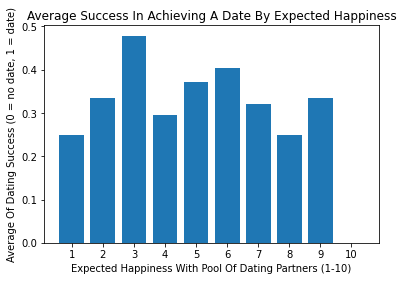

In [87]:
plt.bar(waves_happiness_avgs.keys(), waves_happiness_avgs)
plt.xticks(waves_happiness_avgs.keys())
plt.title('Average Success In Achieving A Date By Expected Happiness')
plt.xlabel('Expected Happiness With Pool Of Dating Partners (1-10)')
plt.ylabel('Average Of Dating Success (0 = no date, 1 = date)')